<a href="https://colab.research.google.com/github/asagar60/BERT_BiLSTM_CRF-model/blob/master/BERT_%2B_BiLSTM_%2B_CRF_Keyphrase_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install Transformers package from HuggingFace**

In [1]:
!pip install transformers

     |████████████████████████████████| 890kB 2.8MB/s 
     |████████████████████████████████| 3.0MB 16.7MB/s 
     |████████████████████████████████| 1.1MB 29.8MB/s 
     |████████████████████████████████| 890kB 49.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=720d2d666f40de857bc09c9609e893b22aa059de63bd6faeb8cd4194284d0de3
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


# **2. Get modified files from github**

In [2]:
!git clone https://github.com/asagar60/BERT_BiLSTM_CRF-model

Cloning into 'BERT_BiLSTM_CRF-model'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 120 (delta 46), reused 99 (delta 34), pack-reused 0
Receiving objects: 100% (120/120), 7.54 MiB | 4.81 MiB/s, done.
Resolving deltas: 100% (46/46), done.


# **3. Download pretrained BERT-BASE-UNCASED files**

- Download pretrained BERT (base-uncased) and vocab file from huggingface
- Place them in model/ folder inside BERT-keyphrase-extraction folder

In [3]:
!wget https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz
!wget https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt

--2020-09-17 10:31:33--  https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.38.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.38.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407873900 (389M) [application/x-tar]
Saving to: ‘bert-base-uncased.tar.gz’

bert-base-uncased.t 100%[===================>] 388.98M  17.2MB/s    in 24s     

2020-09-17 10:31:58 (15.9 MB/s) - ‘bert-base-uncased.tar.gz’ saved [407873900/407873900]

--2020-09-17 10:31:59--  https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.139.109
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.139.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231508 (226K) [text/plain]
Saving to: ‘bert-base-uncased-vocab.txt’

bert-base-uncased-v 100%[===================>] 226.08K   420KB/s    in 0.

In [4]:
!mkdir /content/BERT_BiLSTM_CRF-model/model

In [5]:
!tar -xvf  '/content/bert-base-uncased.tar.gz' -C '/content/BERT_BiLSTM_CRF-model/model' 
!rm '/content/bert-base-uncased.tar.gz'

./pytorch_model.bin
./bert_config.json


In [6]:
!mv '/content/bert-base-uncased-vocab.txt' '/content/BERT_BiLSTM_CRF-model/model/vocab.txt'
!mv '/content/BERT_BiLSTM_CRF-model/model/bert_config.json' '/content/BERT_BiLSTM_CRF-model/model/config.json'

Changes done to the existing code:

- Use transformers from HuggingFace instead of pytorch-pretrained-bert
- For BertTorkenizer , update config using  ```config.update({"num_labels":len(params.tag2idx)})``` evaluate.py
- Load saved model using  ```load_state_dict(checkpoint['state_dict'], strict=False)``` in utils.py
- Remove 100 in ```p = 100 * nb_correct / nb_pred if nb_pred > 0 else 0``` while calculating precision and recall in metrics.py
- Add generate_keyphrase.py to test and write the output to a file.


# **3. Load Data**

In [7]:
import os
import textwrap
from transformers import BertTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'darkgrid')

sns.set(font_scale = 1.5)
plt.rcParams["figure.figsize"] = (10,5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
#train folder for task 1
train_folder = '/content/BERT_BiLSTM_CRF-model/data/task1/train'

In [9]:
#load bert tokenizer
print('Loading BERT Tokenizer..')

tokenizer = BertTokenizer.from_pretrained('/content/BERT_BiLSTM_CRF-model/model/', do_lower_case=True)
wrapper = textwrap.TextWrapper(width=80)

Loading BERT Tokenizer..


In [10]:
#loading vocab data to see which tokens become [UNK] tokens

vocab = []
file_path = '/content/BERT_BiLSTM_CRF-model/model/vocab.txt'
with open(file_path, 'r') as file:
    for v in file:
        vocab.append(v.strip('\n'))

In [11]:
with open(train_folder + '/'+'tags.txt') as fp:
   for cnt, line in enumerate(fp):
     if cnt == 5 :
       break
     print("\nLine : {} \t length : {}".format(cnt,len(line.split())))
     print(" ")
     print("{}".format(wrapper.fill(line)))


Line : 0 	 length : 134
 
I I I O O O O O O O O I I I I I I I I O O O O I I I I I I I I I I I I I I I I I
O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O I I I I I I
I I I I I I I O O I I I I I I I I I I I O O O O O O I O O I O O O O I I I I I I
I I I I I I I I O O O O O O

Line : 1 	 length : 145
 
I I I I I I I I I I I O O O O O O O O I I O O O O O O I I I I I I I I I I I I I
O O O O O O O O O O O I I O O O O O O O O O O I I I I I I I I I I O O O O O O O
O I I I I I I I I I I I I I I I O O O O O O O I I I O O I I O O O O O O O O O O
O O I I I I O O O O O O I I I O O O O O I I I O O

Line : 2 	 length : 85
 
I I I I I I I O O O O O I I I I I I I I I I I I I I I I O O O O I I I O O O O O
O O O I I I I I I I I I O O I I I I O O O I I I I I I I I I I I O O O I I I O O
O O I I I

Line : 3 	 length : 111
 
I I I I I I I I I O O O I I I I O O O O O O O I I I I I I I I O O O O O O O O O
O I I I I I I I O O I I I I I O O I I I I I I I I I O O I O O O O O O O O O I I
I O O

In [12]:
# print 5 sample sentences
with open(train_folder + '/'+'sentences.txt') as fp:
   for cnt, line in enumerate(fp):
     if cnt > 5 :
       break
     print("\nLine : {} \t length : {}".format(cnt,len(line.split())))
     print(" ")
     print("{}".format(wrapper.fill(line)))


Line : 0 	 length : 134
 
complex lange ##vin ( cl ) [ 1 , 2 ] sign problem numerical simulations of
lattice field theories weight , sampling . nonzero chemical potential , lower
and four - dimensional field theories sign problem in the thermodynamic limit [
3 – 8 ] ( for reviews , e . g . refs . [ 9 , 10 ] ) . however , inc ##epti ##on
, [ 11 – 16 ] . improved understanding , relying on the combination of
analytical and numerical insight . past , probability distribution complex
##ified configuration space , lange ##vin process , [ 17 , 18 ] . distribution
local ##ised cl results . importantly , non ##abel ##ian gauge theories , sl ( n
, c ) gauge cooling [ 8 , 10 ] .

Line : 1 	 length : 145
 
nuclear theory thermal ##ization nuclear reactions , semi - classical methods [
13 , 14 , 10 ] , quantum liquids [ 15 , 16 ] . improved molecular dynamics
methods combining quantum features semi classical treatment of dynamical
correlations [ 17 , 18 ] . still , clear - cut quantum approach ye

In [13]:
#print sample line, its tokenized form and vectorized form

with open(train_folder + '/'+'sentences.txt') as fp:
   for cnt, line in enumerate(fp):  
     print("\nLine : {} \t length : {}".format(cnt,len(line.split())))
     print(" ")
     print("{}".format(wrapper.fill(line)))
     
     tokens = line.split()
     word_vector = tokenizer.convert_tokens_to_ids(tokens)
     tokenized = [vocab[i] for i in word_vector ]
     print("\n Tokenized words ")
     print()
     i = 0
     while True:
       if i > len(tokenized):
         break
       start = i
       end = min(start+20, len(tokenized))
       print(tokenized[start:end])
       i = i+20

     print("\n  Word vector form ")
     print(word_vector)
     break


Line : 0 	 length : 134
 
complex lange ##vin ( cl ) [ 1 , 2 ] sign problem numerical simulations of
lattice field theories weight , sampling . nonzero chemical potential , lower
and four - dimensional field theories sign problem in the thermodynamic limit [
3 – 8 ] ( for reviews , e . g . refs . [ 9 , 10 ] ) . however , inc ##epti ##on
, [ 11 – 16 ] . improved understanding , relying on the combination of
analytical and numerical insight . past , probability distribution complex
##ified configuration space , lange ##vin process , [ 17 , 18 ] . distribution
local ##ised cl results . importantly , non ##abel ##ian gauge theories , sl ( n
, c ) gauge cooling [ 8 , 10 ] .

 Tokenized words 

['complex', 'lange', '##vin', '(', 'cl', ')', '[', '1', ',', '2', ']', 'sign', 'problem', 'numerical', 'simulations', 'of', 'lattice', 'field', 'theories', 'weight']
[',', 'sampling', '.', '[UNK]', 'chemical', 'potential', ',', 'lower', 'and', 'four', '-', 'dimensional', 'field', 'theories', 'sign', 

#### we can see words like "NonZero", "Thermodynamic", "refs", "##abel" converted to  ```<UNK>``` embedding

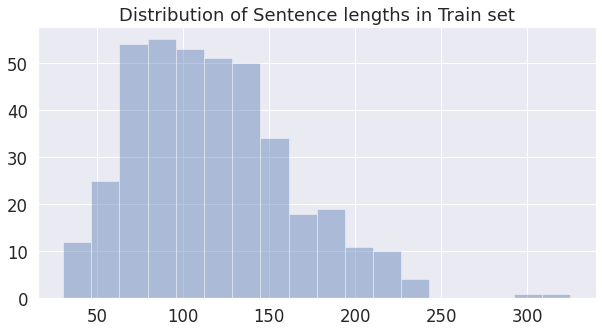

In [14]:
#plot distribution of sentence lengths
len_sentences = []
with open(train_folder + '/'+'sentences.txt') as fp:
   for line in fp:  
     len_sentences.append(len(line.split()))

sns.distplot(len_sentences, kde = False, rug = False).set_title('Distribution of Sentence lengths in Train set')
plt.show()

# **Train and Evaluate the model with default parameters**

#### **a. Train with default parameters**

In [15]:
!python '/content/BERT_BiLSTM_CRF-model/train_bilstm.py' --data_dir '/content/BERT_BiLSTM_CRF-model/data/task1/' --bert_model_dir '/content/BERT_BiLSTM_CRF-model/model/' --model_dir '/content/BERT_BiLSTM_CRF-model/experiments/base_model'

2020-09-17 10:32:12.628045: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
device: cuda, n_gpu: 1, 16-bits training: False
Loading the datasets...
Load Data Done
Initial model Done
Optimizer Done
Starting training for 20 epoch(s)
Epoch 1/20
100% 99/99 [00:19<00:00,  5.19it/s, loss=51.193]
- Train metrics: loss: 34.92; f1: 00.08
- Val metrics: loss: 45.63; f1: 00.08
- Found new best F1
Epoch 2/20
100% 99/99 [00:18<00:00,  5.24it/s, loss=30.581]
- Train metrics: loss: 26.25; f1: 00.22
- Val metrics: loss: 36.03; f1: 00.20
- Found new best F1
Epoch 3/20
100% 99/99 [00:18<00:00,  5.21it/s, loss=27.275]
- Train metrics: loss: 27.47; f1: 00.22
- Val metrics: loss: 39.42; f1: 00.18
Epoch 4/20
100% 99/99 [00:19<00:00,  5.19it/s, loss=24.548]
- Train metrics: loss: 21.17; f1: 00.41
- Val metrics: loss: 27.57; f1: 00.38
- Found new best F1
Epoch 5/20
100% 99/99 [00:19<00:00,  5.21it/s, loss=23.765]
- Train metrics: loss: 21.0

#### **b. Evaluate on Test data**

In [16]:
!python '/content/BERT_BiLSTM_CRF-model/evaluate_bilstm.py' --data_dir '/content/BERT_BiLSTM_CRF-model/data/task1/' --bert_model_dir '/content/BERT_BiLSTM_CRF-model/model/' --model_dir '/content/BERT_BiLSTM_CRF-model/experiments/base_model' --restore_file best

2020-09-17 10:39:27.418431: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading the dataset...
Load Data Done
Initial model Done
- done.
Starting evaluation...
- Test metrics: loss: 27.35; f1: 00.40
             precision    recall  f1-score   support

          I       0.43      0.42      0.43       921

avg / total       0.43      0.42      0.43       921



## **Check the Trained model on 'h1_7.txt'**

In [17]:
!python '/content/BERT_BiLSTM_CRF-model/generate_keyphrase.py' --data_dir '/content/BERT_BiLSTM_CRF-model/data/task1/' --bert_model_dir '/content/BERT_BiLSTM_CRF-model/model/' --model_dir '/content/BERT_BiLSTM_CRF-model/experiments/base_model' --test_file '/content/BERT_BiLSTM_CRF-model/h1_7.txt' --restore_file best

2020-09-17 10:40:03.289488: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Starting Evaluation
output flused to disk
Done


#### **a. Print Sample text data**

In [18]:
with open('/content/BERT_BiLSTM_CRF-model/h1_7.txt') as fp:
   for cnt, line in enumerate(fp):  
     if cnt  > 50:
       break
     print("{}".format(wrapper.fill(line)))

Search APIs

Most search APIs are multi-index, with the exception of the Explain API
endpoints.

Routing

When executing a search, Elasticsearch will pick the "best" copy of the data
based on the adaptive replica selection formula. Which shards will be searched
on can also be controlled by providing the routing parameter. For example, when
indexing tweets, the routing value can be the user name:

In such a case, if we want to search only on the tweets for a specific user, we
can specify it as the routing, resulting in the search hitting only the relevant
shard:

The routing parameter can be multi valued represented as a comma separated
string. This will result in hitting the relevant shards where the routing values
match to.

Adaptive Replica Selection

By default, Elasticsearch will use what is called adaptive replica selection.
This allows the coordinating node to send the request to the copy deemed "best"
based on a number of criteria:

 Response time of past requests between the co

#### **b. Print Outputs**

In [19]:
with open('/content/output.txt') as fp:
     line = fp.readline() 
     print("{}".format(wrapper.fill(line)))

['search', 'with', 'the', 'When', 'executing', 'a', 'search,', 'pick', 'the',
'the', 'data', 'on', 'the', 'replica', 'the', 'such', 'we', 'want', 'to',
'search', 'only', 'on', 'the', 'for', 'specific', 'specify', 'as', 'the', 'the',
'hitting', 'replica', 'size', 'the', 'the', 'data', 'replica', 'off,',
'searches', 'the', 'index/indices', 'shards', 'A', 'search', 'search', 'body',
'the', 'requests', 'the', 'The', 'using', 'the', 'cancelled', 'using',
'cancellation', 'mechanism.', 'By', 'a', 'running', 'search', 'only', 'checks',
'cancelled', 'not', 'on', 'the', 'cancellation', 'delayed', 'large',
'segments.', 'search', 'cancellation', 'cancellation', 'checks', 'noticeable',
'on', 'fast', 'search', 'searches', 'start', 'after', 'the', 'shards', 'the',
'request', 'the', 'search', 'have', 'and', 'organize', 'data', 'shards.', 'you',
'configure', 'requests', 'the', 'for', 'the', 'protect', 'a', 'cluster', 'a',
'default', 'cause', 'execute', 'get', 'hits', 'using', 'with', 'search', 'on',
'w

We see that precision and recall value are too low, F1-score on test data is also small.

It is safe to assume model will not greatly perform , causing the output differ from the actual one in case of h1_7.txt

In [ ]:
#!rm -r '/content/BERT-keyphrase-extraction/model'
#!rm -r '/content/BERT-keyphrase-extraction/experiments'

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

In [ ]:
"""
gdrive_path = '/content/drive/My Drive/BERT_BiLSTM_CRF_Keyphrase_Extraction/'
if not os.path.exists(gdrive_path):
  os.makedirs(gdrive_path)

!cp -r ./BERT-keyphrase-extraction/ '/content/drive/My Drive/BERT_BiLSTM_CRF_Keyphrase_Extraction/'
"""